In [1]:
#1.	Installing and setting up the dependencies needed
!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.3.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
albumentations                1.3.0
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backp

In [3]:
#So, in order the get the images I am going to be using OpenCV, I am  going to import four different libraries which are
import os
import uuid
import cv2
import time

In [4]:
#I created a folder named source and, in that folder, I created another folder named “imgs” and “labels
try:
   os.makedirs("source/images")
except FileExistsError:
   # directory already exists
   pass
try:
   os.makedirs("source/labels")
except FileExistsError:
   # directory already exists
   pass

In [5]:
#Defining the location of the images
Img_Path = os.path.join('source','images')
#defining the number of images
Img_Count = 25

In [6]:
#Establishing a connection with my webcam
capture = cv2.VideoCapture(0)
#•	Loop through the images
for img_count in range(Img_Count):
    #•	Print out the image currently collecting
    print('Getting image {}'.format(img_count))
    #•	Read from the capture device
    ret,frame = capture.read()
    #•	Capture the frame and write it down using CV2
    #•	Setting the unique filename for the images using UUID
    #•	Use the time library and sleep for ½ a second between each frame

    img_name = os.path.join(Img_Path,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(img_name, frame)
    cv2.imshow('Face Detector frame', frame)
    time.sleep(0.6)
    #•	Create the break codes that will allow me to break out of the loop 
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
capture.release()
cv2.destroyAllWindows()

Getting image 0
Getting image 1
Getting image 2
Getting image 3
Getting image 4
Getting image 5
Getting image 6
Getting image 7
Getting image 8
Getting image 9
Getting image 10
Getting image 11
Getting image 12
Getting image 13
Getting image 14
Getting image 15
Getting image 16
Getting image 17
Getting image 18
Getting image 19
Getting image 20
Getting image 21
Getting image 22
Getting image 23
Getting image 24


In [7]:
#	Annotate the images using labelme
!labelme

QWindowsWindow::setGeometry: Unable to set geometry 839x629+1568+48 on QWidgetWindow/'MainWindowClassWindow'. Resulting geometry:  839x646+1568+48 (frame: 8, 31, 8, 8, custom margin: 0, 0, 0, 0, minimum size: 271x629, maximum size: 16777215x16777215).


In [4]:
#Creating a function for loading images
#So, to create a function for loading images I must import a few key dependencies
import tensorflow as tsfl
import json
import numpy as npy
from matplotlib import pyplot as pylt

In [5]:
#b.	Limit the GPU Memory growth by default 
gpus = tsfl.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tsfl.config.experimental.set_memory_growth(gpu, True)

In [6]:
#checking my GPU
tsfl.config.list_physical_devices('GPU')

[]

In [7]:
#Load images into the TensorFlow data pipeline
#Perform a wildcard search for (.jpg) in the images folder
imgs = tsfl.data.Dataset.list_files('source\\images\\*.jpg', shuffle=False)

In [8]:
#Create a load image function to load an image for object detection, read the file path to the byte-encoded image and decode the images to a uint8 tensor
def load_imgs(filepath):
    Img_Byte = tsfl.io.read_file(filepath)
    img = tsfl.io.decode_jpeg(Img_Byte)
    return img


In [9]:
#I applied the function on each value in the dataset using the map component
imgs = imgs.map(load_imgs)
#display the mapped dataset
imgs.as_numpy_iterator().next()


array([[[107,  98,  93],
        [106,  97,  90],
        [106,  97,  90],
        ...,
        [100, 117, 111],
        [102, 117, 112],
        [100, 115, 110]],

       [[108,  97,  91],
        [106,  97,  88],
        [107,  97,  87],
        ...,
        [ 98, 115, 109],
        [101, 116, 111],
        [101, 116, 111]],

       [[110,  98,  86],
        [107,  98,  83],
        [109,  97,  83],
        ...,
        [100, 115, 110],
        [100, 115, 108],
        [ 99, 114, 107]],

       ...,

       [[147, 111,  89],
        [147, 111,  89],
        [147, 111,  89],
        ...,
        [153, 174, 177],
        [154, 173, 177],
        [154, 173, 177]],

       [[146, 109,  91],
        [147, 110,  92],
        [147, 112,  93],
        ...,
        [154, 174, 175],
        [155, 173, 175],
        [155, 173, 175]],

       [[146, 109,  93],
        [147, 110,  94],
        [147, 111,  95],
        ...,
        [154, 174, 175],
        [155, 173, 173],
        [155, 173, 173]]

In [10]:
#Batch the images up using the TensorFlow dataset API
generate_Imgs = imgs.batch(5).as_numpy_iterator()

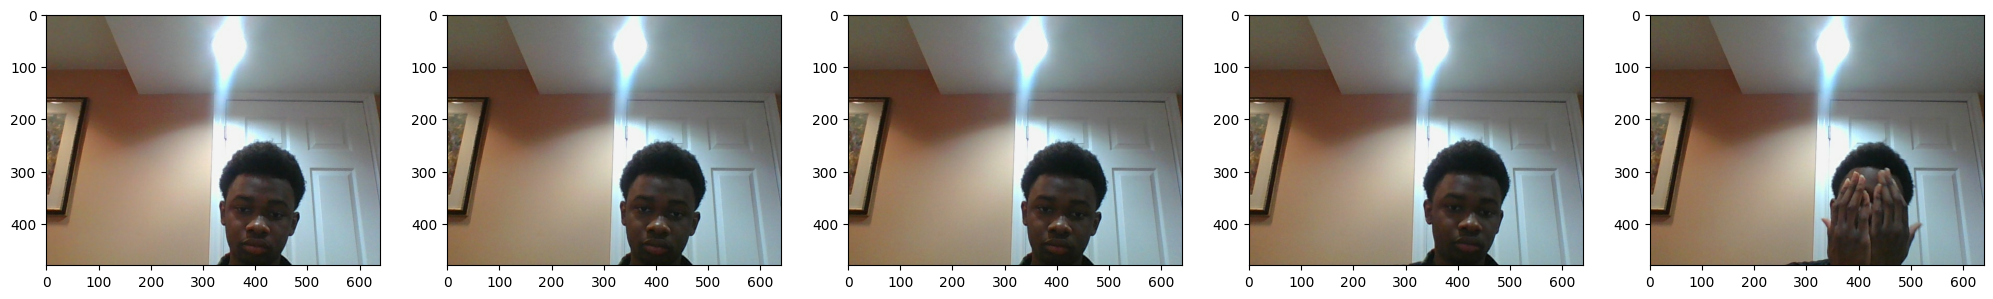

In [11]:
#Use matplotlib and subplots class to loop through and visualize the images
imgs_Plot = generate_Imgs.next()
fig, ax = pylt.subplots(ncols= 5, figsize=(25,25))
for idx, img in enumerate(imgs_Plot):
    ax[idx].imshow(img)
pylt.show()

In [ ]:
#I created 3 folders named "train", "test", and "val" in my source folder and, in those folders each, I created another 2 folders named "imgs" and "labels"
try:
   os.makedirs("source/train/images")
except FileExistsError:
   # directory already exists
   pass
try:
   os.makedirs("source/test/images")
except FileExistsError:
   # directory already exists
   pass
try:
   os.makedirs("source/val/images")
except FileExistsError:
   # directory already exists
   pass
try:
   os.makedirs("source/train/labels")
except FileExistsError:
   # directory already exists
   pass
try:
   os.makedirs("source/test/labels")
except FileExistsError:
   # directory already exists
   pass
try:
   os.makedirs("source/val/labels")
except FileExistsError:
   # directory already exists
   pass

In [ ]:
!pip install split-folders

In [ ]:
#split the image dataset into the train/val/test 
import splitfolders

splitfolders.ratio("source",'source',seed=1337,ratio= (0.7,0.1,0.2), move=False)
#removing empty folders
os.rmdir(r"source/test/test")
os.rmdir(r"source/test/train")
os.rmdir(r"source/test/val")

os.rmdir(r"source/val/test")
os.rmdir(r"source/val/train")
os.rmdir(r"source/val/val")

os.rmdir(r"source/train/test")
os.rmdir(r"source/train/train")
os.rmdir(r"source/train/val")

#It's randomly splitting labels folder so to fix that I decided to empty the folder and create a new function to split labels according to images split
path = r"source/train/labels\\"
for file_name in os.listdir(path):
    # construct full file path
    file = path + file_name
    if os.path.isfile(file):
        os.remove(file)
path = r"source/test/labels\\"
for file_name in os.listdir(path):
    # construct full file path
    file = path + file_name
    if os.path.isfile(file):
        os.remove(file)
path = r"source/val/labels\\"
for file_name in os.listdir(path):
    # construct full file path
    file = path + file_name
    if os.path.isfile(file):
        os.remove(file)

In [ ]:
#Move the labels for the images that have been split from the root folder to the train, test and Val folders
for Folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('source', Folder, 'images')):
        filename = file.split('.')[0]+'.json'
        current_Filepath = os.path.join('source','labels', filename)
        if os.path.exists(current_Filepath):
            new_Filepath = os.path.join('source', Folder, 'labels',filename)
            os.replace(current_Filepath, new_Filepath)


In [12]:
import albumentations as A

In [13]:
#c.	Defining my augmentation pipeline: I have six different argumentations that I am going to apply for my program which are:
#HorizontalFlip,VerticalFlip,RandomCrop,RandomBrightnessContrast,RandomGamma,RGBShift
transform = A.Compose([A.HorizontalFlip(p=float(0.5)), 
A.VerticalFlip(p=float(0.5)), 
A.RandomCrop(width=450, height=450), 
A.RandomBrightnessContrast(p=float(0.2)), 
A.RandomGamma(p=float(0.2)), 
A.RGBShift(p=float(0.2))], 
bbox_params=A.BboxParams(format='albumentations', label_fields=['class_labels']))


In [48]:
#Load a test image and labels from the train folder
img = cv2.imread(os.path.join('source','train', 'images','02bfc91e-6a07-11ed-943c-00090faa0001.jpg'))
with open(os.path.join('source','train', 'labels', '02bfc91e-6a07-11ed-943c-00090faa0001.json'), 'r') as f:
    bboxes = json.load(f)


In [49]:
print(type(img))

<class 'numpy.ndarray'>


In [ ]:
bboxes['shapes'][0]['points']

In [20]:
coordinates = [0,0,0,0]
coordinates[0] = bboxes['shapes'][0]['points'][0][0]
coordinates[1] = bboxes['shapes'][0]['points'][0][1]
coordinates[2] = bboxes['shapes'][0]['points'][1][0]
coordinates[3] = bboxes['shapes'][0]['points'][1][1]

In [21]:
coordinates = list(npy.divide(coordinates, [640,480,640,480]))
coordinates

[0.512063419117647, 0.5107230392156864, 0.7797564338235293, 0.9947916666666666]

In [22]:
transformed = transform(image=img, bboxes=[coordinates], class_labels=['FaceDetected'])

transformed['image']

array([[[179, 197, 162],
        [180, 198, 163],
        [181, 199, 164],
        ...,
        [ 65, 128, 144],
        [ 67, 127, 144],
        [ 67, 127, 144]],

       [[180, 198, 163],
        [180, 198, 163],
        [180, 198, 163],
        ...,
        [ 63, 127, 145],
        [ 65, 127, 145],
        [ 65, 127, 145]],

       [[181, 199, 164],
        [180, 198, 163],
        [180, 198, 163],
        ...,
        [ 65, 129, 147],
        [ 64, 128, 146],
        [ 66, 128, 146]],

       ...,

       [[122, 142, 119],
        [125, 143, 118],
        [126, 144, 119],
        ...,
        [ 59, 101, 102],
        [ 59, 101, 102],
        [ 59, 103, 102]],

       [[120, 142, 119],
        [123, 143, 118],
        [126, 144, 119],
        ...,
        [ 59, 101, 102],
        [ 60, 102, 103],
        [ 59, 103, 102]],

       [[121, 142, 121],
        [124, 144, 121],
        [125, 145, 122],
        ...,
        [ 59, 101, 102],
        [ 59, 101, 102],
        [ 59, 102, 103]]

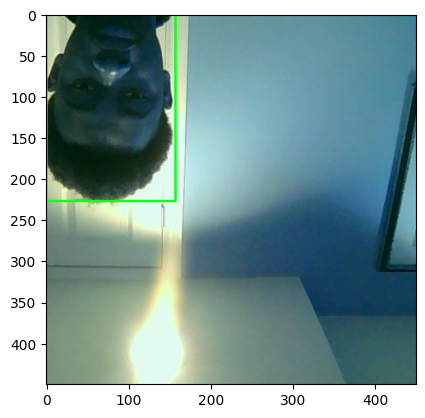

In [23]:
#Applying Augmentations
#So, I visualized the image and set the true tuples that I need to draw the bounding box

cv2.rectangle(transformed['image'],
tuple(npy.multiply(transformed['bboxes'][0][:2], [450,450]).astype(int)),
tuple(npy.multiply(transformed['bboxes'][0][2:], [450,450]).astype(int)),
(15,252,39), 2)
pylt.imshow(transformed['image'])

In [ ]:
#3.	Create a folder called aug_data and create train/test/Val subfolders and in those subfolders create an image and labels folder
try:
   os.makedirs("data/train/images")
except FileExistsError:
   # directory already exists
   pass
try:
   os.makedirs("data/test/images")
except FileExistsError:
   # directory already exists
   pass
try:
   os.makedirs("data/val/images")
except FileExistsError:
   # directory already exists
   pass

try:
   os.makedirs("data/train/labels")
except FileExistsError:
   # directory already exists
   pass
try:
   os.makedirs("data/test/labels")
except FileExistsError:
   # directory already exists
   pass
try:
   os.makedirs("data/val/labels")
except FileExistsError:
   # directory already exists
   pass


In [ ]:
#Run the Augmentation pipeline over the train/ Val/ test partitions for all images
#Loop through the train, test, and Val folders
for partition in ['train', 'test', 'val']:
    for image in os.listdir(os.path.join('source', partition, 'images')):
        #	Collect all images and double-check if an annotation exists for that image
        img = cv2.imread(os.path.join('source', partition, 'images', image))
        #	If an annotation doesn’t exist, I set up a default coordinate and if it does exist,
        coordinates = [0,0,0.00001,0.00001]
        label_path = os.path.join('source', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                bboxes = json.load(f)
#  I extracted the coordinates and rescaled it to represent the size of the image because I need to transform it into normalized values
   
            coordinates[0] = bboxes['shapes'][0]['points'][0][0]
            coordinates[1] = bboxes['shapes'][0]['points'][0][1]
            coordinates[2] = bboxes['shapes'][0]['points'][1][0]
            coordinates[3] = bboxes['shapes'][0]['points'][1][1]
            coordinates = list(npy.divide(coordinates, [640,480,640,480]))
#	Next, I’m going to create 50 images augmented images for every single base image
        try: 
            #That means for the 50 images that I previously created;
            #  I’m going to be multiplying by 50 augmented images that I’m going to be able to use
            for x in range(50):
                augmented = transform(image = img, bboxes = [coordinates], class_labels = ['FaceDetected'])
                #Write out the augmented image and place it inside a folder called aug_data
                cv2.imwrite(os.path.join('data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0

                with open(os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    #Transform the coordinates and write down the annotations using JSON dump
                    json.dump(annotation, f)

        except Exception as e:
            print(e)


In [24]:
#loading images into my Tensorflow dataset
train_images = tsfl.data.Dataset.list_files('data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_imgs)
train_images = train_images.map(lambda x: tsfl.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

test_images = tsfl.data.Dataset.list_files('data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_imgs)
test_images = test_images.map(lambda x: tsfl.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

val_images = tsfl.data.Dataset.list_files('data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_imgs)
val_images = val_images.map(lambda x: tsfl.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

train_images.as_numpy_iterator().next()


array([[[0.42287582, 0.37973857, 0.33137256],
        [0.41470587, 0.38333333, 0.30490196],
        [0.4107843 , 0.37581697, 0.329085  ],
        ...,
        [0.4       , 0.43627462, 0.42810467],
        [0.38039216, 0.45      , 0.43137255],
        [0.38758186, 0.45032695, 0.42875832]],

       [[0.42941177, 0.38039216, 0.3       ],
        [0.4254902 , 0.3764706 , 0.31470588],
        [0.41633984, 0.38235295, 0.32777774],
        ...,
        [0.41274497, 0.45588222, 0.42450967],
        [0.3872549 , 0.44607842, 0.42058823],
        [0.4111108 , 0.4601304 , 0.43856177]],

       [[0.41797385, 0.38398695, 0.29411766],
        [0.4127451 , 0.3852941 , 0.31862745],
        [0.40228757, 0.3895425 , 0.29313725],
        ...,
        [0.41372573, 0.45294142, 0.4431375 ],
        [0.4137255 , 0.4509804 , 0.44705883],
        [0.4049022 , 0.44411787, 0.4401963 ]],

       ...,

       [[0.5803922 , 0.4392157 , 0.33006534],
        [0.5862745 , 0.45490196, 0.3127451 ],
        [0.57058823, 0

In [50]:
#Create a load label function to load a label for object detection, read the file path to the byte-encoded label and decode the label to a uint8 tensor
def load_labels(filepath):
    with open(filepath.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']


In [51]:
#loading labels into my Tensorflow dataset
train_labels = tsfl.data.Dataset.list_files('data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tsfl.py_function(load_labels, [x], [tsfl.uint8, tsfl.float16]))

test_labels = tsfl.data.Dataset.list_files('data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tsfl.py_function(load_labels, [x], [tsfl.uint8, tsfl.float16]))

val_labels = tsfl.data.Dataset.list_files('data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tsfl.py_function(load_labels, [x], [tsfl.uint8, tsfl.float16]))


In [52]:
#checking the lengths of the image and labels partition
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(35, 35, 10, 10, 5, 5)

In [53]:
#combining all examples of the datasets
train = tsfl.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(2000)
train = train.batch(4)
train = train.prefetch(2)

test = tsfl.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(900)
test = test.batch(4)
test = test.prefetch(2)

val = tsfl.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(500)
val = val.batch(4)
val = val.prefetch(2)

train.as_numpy_iterator().next()[1].shape


(array([[1],
        [0],
        [1],
        [0]], dtype=uint8),
 array([[0.5054, 0.477 , 0.788 , 0.998 ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.5054, 0.477 , 0.788 , 0.998 ],
        [0.    , 0.    , 0.    , 0.    ]], dtype=float16))

In [55]:
#loopthrough the different batches
samples = train.as_numpy_iterator()

In [68]:
#grab the next batch
res = samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


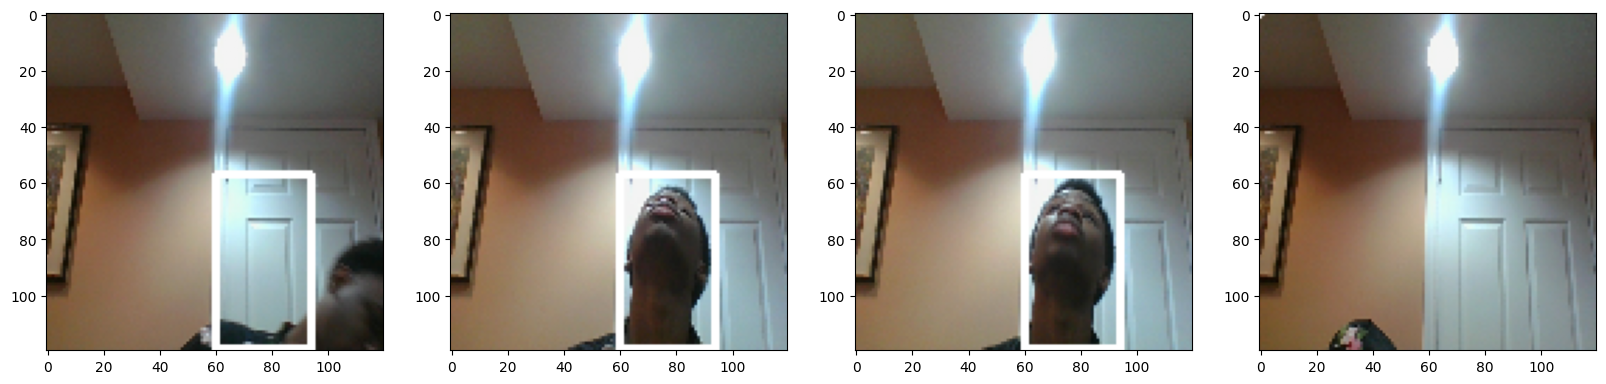

In [69]:
#Use matplotlib and subplots class to loop through and visualize the sample images
fig, ax = pylt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    image_sample= res[0][idx]
    coordinates_sample = res[1][1][idx]
    
    cv2.rectangle(image_sample, 
                  tuple(npy.multiply(coordinates_sample[:2], [120,120]).astype(int)),
                  tuple(npy.multiply(coordinates_sample[2:], [120,120]).astype(int)), 
                        (15,252,39), 2)

    ax[idx].imshow(image_sample)

In [70]:
#import some tensflow libraries such as (Model, Input, Conv2D, Dense, GlobalMaxPooling2D, VGG16)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [71]:
#Create an instance of VGG
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 1s 0us/step


In [72]:
#show what the neural network looks like
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [73]:
#in this function i built my neural network which consist of classification and bounding box model
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)
    value1 = GlobalMaxPooling2D()(vgg)
    first_classification = Dense(2048, activation='relu')(value1)
    second_classification = Dense(1, activation='sigmoid')(first_classification)
    
    value2 = GlobalMaxPooling2D()(vgg)
    first_regression = Dense(2048, activation='relu')(value2)
    second_regression = Dense(4, activation='sigmoid')(first_regression)
    
    trackingface = Model(inputs=input_layer, outputs=[second_classification, second_regression])
    return trackingface


In [74]:
#testing the built network
trackingface = build_model()
trackingface.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [75]:
images, labels = train.as_numpy_iterator().next()

In [76]:
images.shape

(4, 120, 120, 3)

In [77]:
classes, coordinates = trackingface.predict(images)

1/1 [==============================] - 0s 305ms/step


In [78]:
classes, coordinates

(array([[0.45911506],
        [0.4499963 ],
        [0.45246387],
        [0.43749017]], dtype=float32),
 array([[0.57879317, 0.42661503, 0.34276673, 0.5243825 ],
        [0.60500264, 0.4047155 , 0.34348366, 0.5381918 ],
        [0.5671962 , 0.42757338, 0.34455726, 0.52195126],
        [0.51318157, 0.46203178, 0.30584198, 0.53426355]], dtype=float32))

In [80]:
#specify our learning rate decay
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch
#setup the optimizer using the Adam optimizer
optimizer = tsfl.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [86]:
#Create the localization loss
#Getting the actual and predicted width & height
#Calculating the delta coordinates and size
def localization_loss(y_true, yhat):            
    delta_coordinate = tsfl.reduce_sum(tsfl.square(y_true[:,:2] - yhat[:,:2])) 
    actual_height = y_true[:,3] - y_true[:,1] 
    actual_width = y_true[:,2] - y_true[:,0] 
    predicted_height = yhat[:,3] - yhat[:,1] 
    predicted_width = yhat[:,2] - yhat[:,0] 
    delta_size = tsfl.reduce_sum(tsfl.square(actual_width - predicted_width) + tsfl.square(actual_height - predicted_height))
    
    return delta_coordinate + delta_size

In [87]:
#Pass the classification loss to the training pipeline
classificationloss = tsfl.keras.losses.BinaryCrossentropy()
#Pass the regression loss to the localization loss
regressionloss = localization_loss

In [88]:
#testing the losses
localization_loss(labels[1], coordinates)
classificationloss(labels[0], classes)
regressionloss(labels[1], coordinates)


<tf.Tensor: shape=(), dtype=float32, numpy=1.8031557>

In [89]:
#Creating a model class
class TrackingFace(Model): 
    #Create an init method to pass through initial parameters
    def __init__(self, trackinghead,  **kwargs): 
        super().__init__(**kwargs)
        self.model = trackinghead
    #Create a compile method and pass through the losses and optimizer
    def compile(self, optimizer, classificationloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.classificationloss = classificationloss
        self.localizationloss = localizationloss
        self.optimizer = optimizer
    #Create a train step where the neural network training takes place
    def train_step(self, batch, **kwargs): 
        
        images, labels = batch
        #applying back crop and calculating the gradient
        with tsfl.GradientTape() as tape: 
            classes, coordinates = self.model(images, training=True)
            
            batch_classificationloss = self.classificationloss(labels[0], classes)
            batch_localizationloss = self.localizationloss(tsfl.cast(labels[1], tsfl.float32), coordinates)
            
            total_loss = batch_localizationloss+0.5*batch_classificationloss
            
            gradient = tape.gradient(total_loss, self.model.trainable_variables)
        
        optimizer.apply_gradients(zip(gradient, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "classification_loss":batch_classificationloss, "regression_loss":batch_localizationloss}
    #Create a test step it’s triggered by the validation dataset and it’s almost identical to the train step 
    #the only difference is that I’m not applying back crop and calculating the gradient
    def test_step(self, batch, **kwargs): 
        images, labels = batch
        
        classes, coordinates = self.model(images, training=False)
        
        batch_classificationloss = self.classificationloss(labels[0], classes)
        batch_localizationloss = self.localizationloss(tsfl.cast(labels[1], tsfl.float32), coordinates)
        total_loss = batch_localizationloss+0.5*batch_classificationloss
        
        return {"total_loss":total_loss, "classification_loss":batch_classificationloss, "regression_loss":batch_localizationloss}
    #	Create the call method
    def call(self, images, **kwargs): 
        return self.model(images, **kwargs)

In [90]:
#Subclass the model
model = TrackingFace(trackingface)
model.compile(optimizer, classificationloss, regressionloss)


In [93]:
#specify the log directory
logdir='logs'
#create a tensorboard call back 
tensorboard_callback = tsfl.keras.callbacks.TensorBoard(log_dir=logdir)
#Save the training history
history = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
9/9 [==============================] - 5s 524ms/step - total_loss: 0.0136 - classification_loss: 0.0027 - regression_loss: 0.0122 - val_total_loss: 0.0033 - val_classification_loss: 1.2065e-04 - val_regression_loss: 0.0033
Epoch 2/10
9/9 [==============================] - 5s 525ms/step - total_loss: 0.0084 - classification_loss: 0.0020 - regression_loss: 0.0073 - val_total_loss: 0.0316 - val_classification_loss: 1.6059e-04 - val_regression_loss: 0.0316
Epoch 3/10
9/9 [==============================] - 5s 512ms/step - total_loss: 0.0072 - classification_loss: 0.0021 - regression_loss: 0.0062 - val_total_loss: 0.0107 - val_classification_loss: 0.0120 - val_regression_loss: 0.0047
Epoch 4/10
9/9 [==============================] - 5s 522ms/step - total_loss: 0.0060 - classification_loss: 0.0018 - regression_loss: 0.0050 - val_total_loss: 0.1604 - val_classification_loss: 0.1818 - val_regression_loss: 0.0695
Epoch 5/10
9/9 [==============================] - 5s 525ms/step - total_

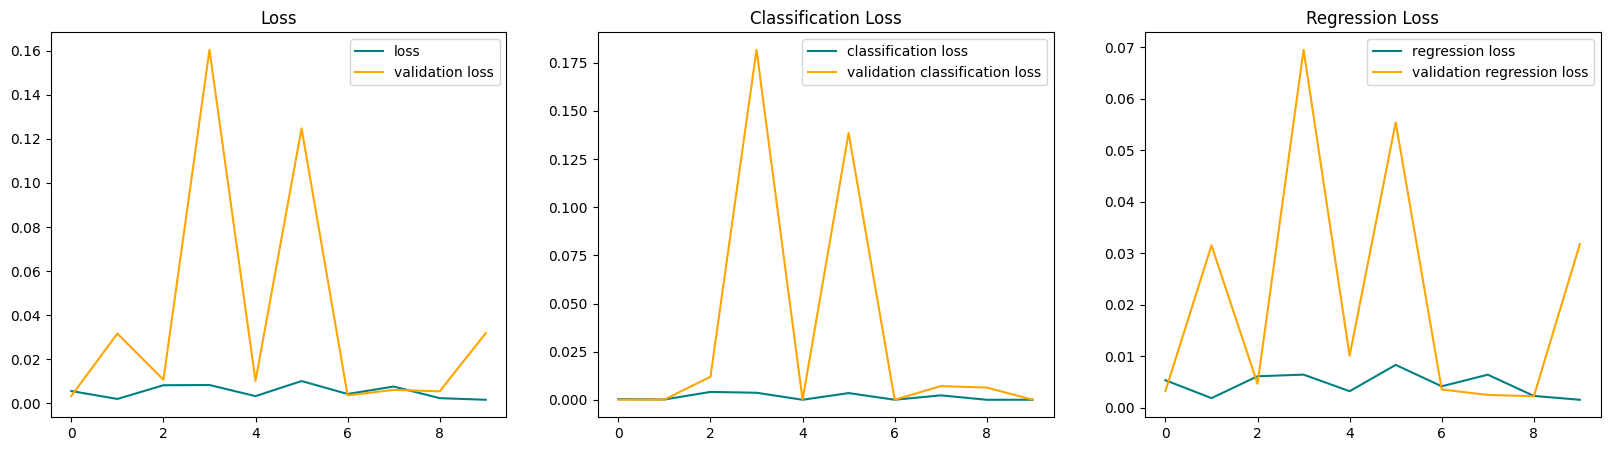

In [96]:
#Use matplotlib and subplots class to loop through and visualize the Loss
fig, ax = pylt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(history.history['total_loss'], color='teal', label='loss')
ax[0].plot(history.history['val_total_loss'], color='orange', label='validation loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(history.history['classification_loss'], color='teal', label='classification loss')
ax[1].plot(history.history['val_classification_loss'], color='orange', label='validation classification loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(history.history['regression_loss'], color='teal', label='regression loss')
ax[2].plot(history.history['val_regression_loss'], color='orange', label='validation regression loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

pylt.show()


In [97]:
#making predictions
Tdata = test.as_numpy_iterator()
Tsample = Tdata.next()
yhat = trackingface.predict(Tsample[0])


1/1 [==============================] - 0s 111ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


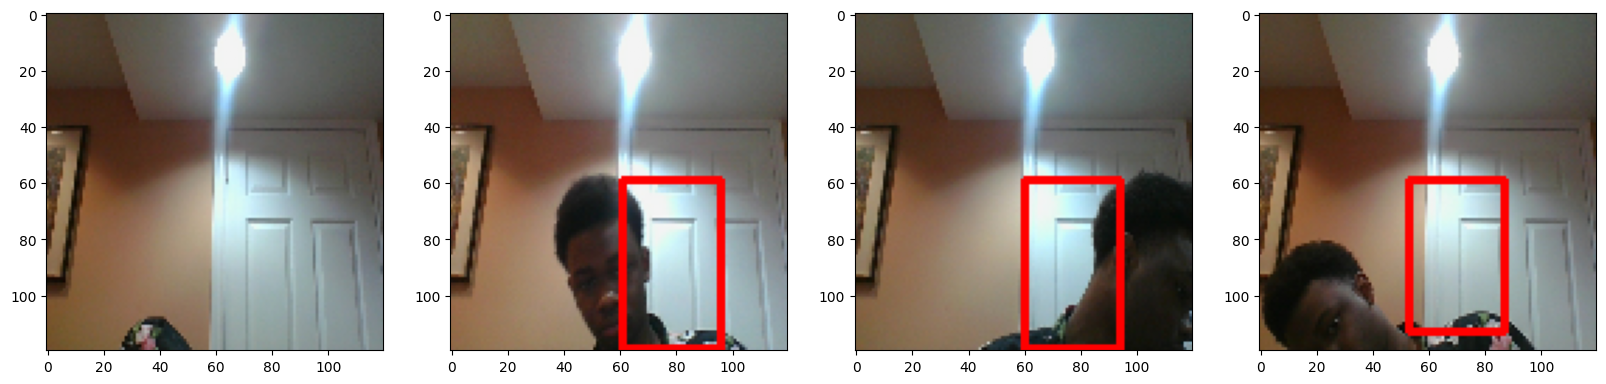

In [104]:
#Use matplotlib and subplots class to loop through and visualize the predictions
fig, ax = pylt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    image_sample = Tsample[0][idx]
    coordinates_sample = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(image_sample, 
                      tuple(npy.multiply(coordinates_sample[:2], [120,120]).astype(int)),
                      tuple(npy.multiply(coordinates_sample[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(image_sample)


In [101]:
from tensorflow.keras.models import load_model

In [102]:
#Saving & loading model
trackingface.save('trackingface.h5')
trackingface = load_model('trackingface.h5')


In [106]:
#Getting Real Time Detection by controlling the main, label rectangle and moving with the face detected
#Capturing the video frame
capture = cv2.VideoCapture(0)
while capture.isOpened():
    _ , frame = capture.read()
    #cutting down the pixels
    frame = frame[50:500, 50:500,:]
    #converting to RGB
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    #reseize it to be 120 x 120 pixels
    resized = tsfl.image.resize(rgb, (120,120))
    #divide by 255 to scale it down
    yhat = trackingface.predict(npy.expand_dims(resized/255,0))
    coordinates_sample = yhat[1][0]
    #perform rendering to control the main, label-rectangle and text rendered 
    if yhat[0] > 0.5: 
        cv2.rectangle(frame, 
                      tuple(npy.multiply(coordinates_sample[:2], [450,450]).astype(int)),
                      tuple(npy.multiply(coordinates_sample[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        cv2.rectangle(frame, 
                      tuple(npy.add(npy.multiply(coordinates_sample[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(npy.add(npy.multiply(coordinates_sample[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (15,252,39), -1)
        
        cv2.putText(frame, 'FaceDetected', tuple(npy.add(npy.multiply(coordinates_sample[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (15,252,39), 2, cv2.LINE_AA)
    
    cv2.imshow('HeadTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
capture.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 58ms/step


KeyboardInterrupt: 